In [1]:
%matplotlib inline
import pandas as pd
from mpl_toolkits.basemap import Basemap
import numpy as np
from utilities import timestamps
from utilities.plotting import equi
from utilities.polygon_selection import get_node_data
from utilities.stats import calc_fmd_stats_with_mc
import matplotlib.pyplot as plt
from scipy import spatial

In [2]:
df = pd.read_csv('data/ccu.dat', delimiter='\t', names=['lon', 'lat', 'decimal_year', 'month', 'day', 'mag'
                                                        , 'depth', 'hour', 'minute', 'second', 'horizontal_error'
                                                        , 'depth_error', 'mag_err'])
df['timestamp'] = df.decimal_year.apply(timestamps.convert_decimal_year_to_numpy_datetime64)

In [3]:
def plot_seismicity_map(dataframe, **kwargs):
    """
    Plots seismicity map for provided catalog
    
    Plots depth as color, magnitude proportional
    to size. Plots down to 100km. >100km depths
    are reduced to 100km in color chart.
    
    Fails on catalogs with >1 million events
    (perhaps smaller).
    
    
    """
    df = dataframe.copy()

    lat_min = np.floor(df.lat.min())
    lat_max = np.ceil(df.lat.max())
    lon_min = np.floor(df.lon.min())
    lon_max = np.ceil(df.lon.max())

    fig, ax = plt.subplots(1, figsize=(8,8))
    m = Basemap(projection='merc'
           ,llcrnrlat=lat_min
           ,urcrnrlat=lat_max
           ,llcrnrlon=lon_min
           ,urcrnrlon=lon_max
           ,resolution='i'
           ,area_thresh=1000
           ,ax=ax)

    lat_labels = np.arange(lat_min, lat_max, int((lat_max - lat_min)/4))
    lon_labels = np.arange(lon_min, lon_max, int((lat_max - lat_min)/4))

    m.drawparallels(lat_labels, labels=lat_labels)
    m.drawmeridians(lon_labels, labels=lon_labels)
    
    m.drawcoastlines()
    m.fillcontinents(color='0.72', zorder=0)
    
    x, y = m(df.lon.values, df.lat.values)
    cbar = ax.scatter(x, y, c=df.depth.values, s=1*np.exp(df.mag.values/2.), edgecolor='None'
                  , cmap='rainbow', alpha=0.5, vmin=0, vmax=100)
    c1 = fig.colorbar(cbar, label='depth (km)',fraction=0.0346, pad=0.084)
    c1.ax.invert_yaxis()
    
    return fig, ax

(<matplotlib.figure.Figure at 0x7ff03f119d30>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff03b0540b8>)

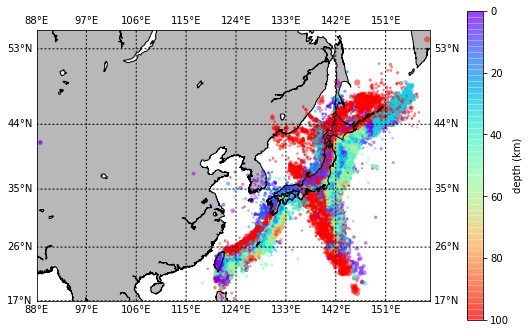

In [4]:
plot_seismicity_map(dataframe=df[df.mag>3])

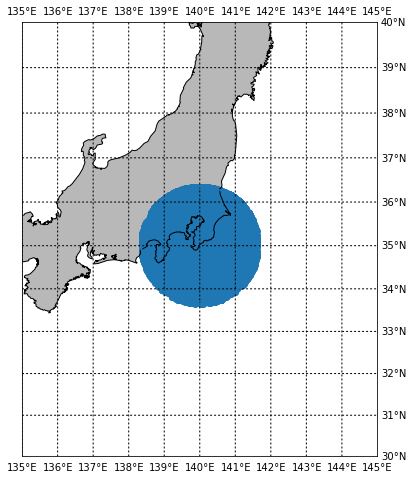

In [5]:

fig, ax = plt.subplots(1, figsize=(8,8))
m = Basemap(projection='merc'
       ,llcrnrlat=30
       ,urcrnrlat=40
       ,llcrnrlon=135
       ,urcrnrlon=145
       ,resolution='i'
       ,area_thresh=1000
       ,ax=ax)

# lat_labels = np.arange(lat_min, lat_max, int((lat_max - lat_min)/4))
# lon_labels = np.arange(lon_min, lon_max, int((lat_max - lat_min)/4))

lat_labels = np.arange(0, 180, 1)
lon_labels = lat_labels
m.drawparallels(lat_labels, labels=lat_labels)
m.drawmeridians(lon_labels, labels=lon_labels)

m.drawcoastlines()
m.fillcontinents(color='0.72', zorder=0)

df_x = get_node_data(node=(140, 35), data=df, radius=150, m=m)

x, y = m(df_x.lon.values, df_x.lat.values)
ax.scatter(x, y)

equi(m=m, centerlon=140, centerlat=35, radius=150)

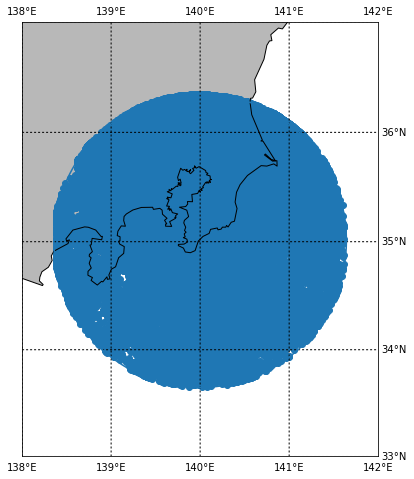

In [6]:

fig, ax = plt.subplots(1, figsize=(8,8))
m = Basemap(projection='merc'
       ,llcrnrlat=33
       ,urcrnrlat=37
       ,llcrnrlon=138
       ,urcrnrlon=142
       ,resolution='i'
       ,area_thresh=1000
       ,ax=ax)

# lat_labels = np.arange(lat_min, lat_max, int((lat_max - lat_min)/4))
# lon_labels = np.arange(lon_min, lon_max, int((lat_max - lat_min)/4))

lat_labels = np.arange(0, 180, 1)
lon_labels = lat_labels
m.drawparallels(lat_labels, labels=lat_labels)
m.drawmeridians(lon_labels, labels=lon_labels)

m.drawcoastlines()
m.fillcontinents(color='0.72', zorder=0)

df_x = get_node_data(node=(140, 35), data=df, radius=150, m=m)

x, y = m(df_x.lon.values, df_x.lat.values)
ax.scatter(x, y)

equi(m=m, centerlon=140, centerlat=35, radius=150)

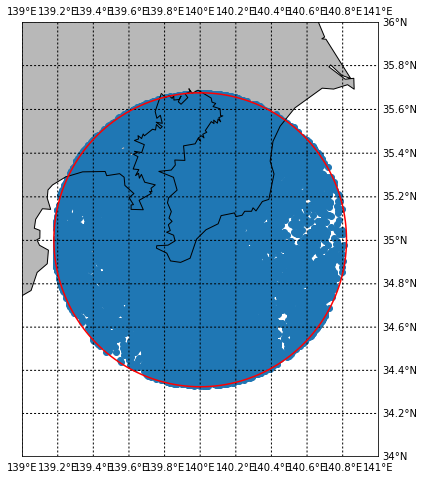

In [7]:

fig, ax = plt.subplots(1, figsize=(8,8))
m = Basemap(projection='merc'
       ,llcrnrlat=34
       ,urcrnrlat=36
       ,llcrnrlon=139
       ,urcrnrlon=141
       ,resolution='i'
       ,area_thresh=1000
       ,ax=ax)

# lat_labels = np.arange(lat_min, lat_max, int((lat_max - lat_min)/4))
# lon_labels = np.arange(lon_min, lon_max, int((lat_max - lat_min)/4))

lat_labels = np.arange(0, 180, 0.2)
lon_labels = lat_labels
m.drawparallels(lat_labels, labels=lat_labels)
m.drawmeridians(lon_labels, labels=lon_labels)

m.drawcoastlines()
m.fillcontinents(color='0.72', zorder=0)

df_x = get_node_data(node=(140, 35), data=df, radius=75, m=m)

x, y = m(df_x.lon.values, df_x.lat.values)
ax.scatter(x, y)

equi(m=m, centerlon=140, centerlat=35, radius=75, color='red')

In [8]:
# def deg2km(lat, lon, refLat, refLon):
#     # INPUT:
#     # lat = earthquake latitude (degrees)
#     # lon = earthquake longitude (degrees)
#     # refLat = reference latitude (degrees)
#     # refLon = reference longitude (degrees)

#     latDiff = lat - refLat  # difference in latitude between point, reference (degrees)
#     lonDiff = lon - refLon  # difference in longitude between point, reference (degrees)
#     latkm = latDiff * 111.19  # latitude (km)
#     latRadians = np.deg2rad(lat)  # earthquake latitude (radians)
#     lonkm = 111.19 * lonDiff * np.cos(latRadians)  # earthquake longitude (km)
#     kmCoords = np.array([lonkm, latkm])

#     return kmCoords

In [9]:
# def distance_between_two_coordinates(lat_a, lon_a, lat_b, lon_b):
#     """
#     calculates the distance between two LAT/LON coordinates
    
#     accurate up to 200km distances
    
#     returns single LON/LAT vector difference
#     """
#     lat_diff = lat_a - lat_b
#     lon_diff = lon_a - lon_b
#     lat_km = 111.19 * lat_diff
    
#     lat_radians = np.deg2rad(lat_a)
#     lon_km = 111.19 * lon_diff * np.cos(lat_radians)
#     distance = np.array([lon_km, lat_km])
#     x, y = distance
#     return np.sqrt(x**2 + y**2)

In [10]:
# def get_node_data(node, radius, data, m):
#     """
#     returns data within a circle with given radius
#     """
#     node_lon = node[0]
#     node_lat = node[1]
    
#     distance_from_node = (radius * 1.2)/111.19
    
#     lon_bounds = [node_lon - distance_from_node, node_lon + distance_from_node]
#     lat_bounds = [node_lat - distance_from_node, node_lat + distance_from_node]
    
#     df = data.copy()
#     df = df[df.lon.between(lon_bounds[0], lon_bounds[1]) &
#             df.lat.between(lat_bounds[0], lat_bounds[1])]
    
#     df['distance'] = df.apply(lambda row: distance_between_two_coordinates(row['lat'], row['lon'], node_lat, node_lon), axis=1)
#     df = df[df.distance <= radius]
#     return df

In [11]:
# dist = np.vectorize(distance_between_two_coordinates)

In [12]:
# deg2km(35, 140.8, 35, 140)
# 

In [13]:
# distance_between_two_coordinates(35, 140.8, 35, 140)

In [14]:
# df.ix[0:100].apply(lambda row: distance_between_two_coordinates(row['lat'], row['lon'], 35, 140), axis=1)

In [15]:
# 75./111.32

In [16]:
# degrees_to_km = 111.32 * np.cos(lat)

In [17]:
# lat = np.arccos(111/111.32)
# lat

In [18]:
# 1/np.cos(150/111)

In [19]:
# from pyproj import Proj

In [20]:
# myProj = Proj(init='WGS84')